# Who performs better?

Hooray, you have seen all the classifiers. But who is better? There is no clear answer on that. Every classifier is good in different tasks. But you cannot know by heart. The most efficient way to find out who performs beteer is to test them. 

And here is the challenge. You have [this](https://www.kaggle.com/uciml/mushroom-classification) dataset and you need to clean, organize, etc the data, apply all the classifiers we have presented you (or if you fine any other interesting classifier, feel free to test him too), and see the results. Do a comparizon and finally decide who is "better fit" for this dataset. 

If you find this exciting, or you finish early, feel free to do the same in a dataset of your preference. 

## Imports

In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## DataFrame

In [2]:
df = pd.read_csv('Data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Preprocessing

In [3]:
from sklearn.model_selection import train_test_split

def split_data(df, y_col, X_col, size=0.25, rand=42):
    #split dataset in features and target variable
    X = df[X_col] # Features
    y = df[y_col] # Target variable
    return train_test_split(X,y,test_size=size,random_state=rand)

In [4]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

le = preprocessing.LabelEncoder()
les = {col: preprocessing.LabelEncoder() for col in df.columns}

for col in les:
    df[col] = les[col].fit_transform(df[col])


feature_cols = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat']

X_train,X_test,y_train,y_test = split_data(df, 'class', feature_cols)

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

## KNN

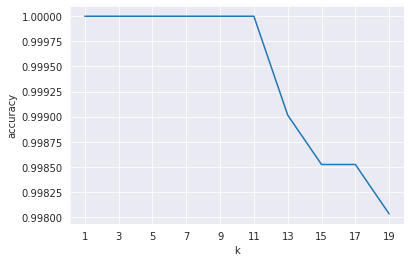

In [15]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

def knn_finder(X_train, y_train, X_test, y_test, k):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    # Model Accuracy, how often is the classifier correct?
    knn_test_score = accuracy_score(knn.predict(X_test), y_test)
    # print("KNeighbors Accuracy:\n", knn_test_score)
    return knn_test_score

k_scores = []
for i in range(1,20, 2):
    acc = knn_finder(X_train, y_train, X_test, y_test, i)
    k_scores.append([i, acc])
scores = pd.DataFrame(k_scores, columns=['k', 'accuracy'])

sns.set_style('darkgrid')
ax = sns.lineplot(x='k', y='accuracy', data=scores, markers=True)
ax.set_xticks(range(1,20, 2))
plt.show()

## LogReg

In [18]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# calc test_score
logreg_test_score = accuracy_score(logreg.predict(X_test), y_test)
print("LogisticRegression Accuracy:\n" ,logreg_test_score)

# instantiate the model (using the balanced parameter)
bal_logreg = LogisticRegression(class_weight='balanced')

# fit the model with data
bal_logreg.fit(X_train,y_train)

# calc test_score
bal_logreg_test_score = accuracy_score(bal_logreg.predict(X_test), y_test)
print("Balanced LogisticRegression Accuracy:\n" ,bal_logreg_test_score)

LogisticRegression Accuracy:
 0.9527326440177253
Balanced LogisticRegression Accuracy:
 0.9547021171836534


## Decision Tree

In [ ]:
TBA